##Descrição do Problema:

Este projeto de Análise Exploratória de Dados faz parte da formação de Analista de Dados, oferecida por Luke Barousse. O principal objetivo é explorar um conjunto de dados reais sobre ofertas de emprego na área de dados, utilizando Python outras ferramenta de análise.

Os objetivos específicos do projeto incluem:

    Investigar quais são as funções e habilidades mais bem remuneradas no setor de dados.
    Analisar tendências de demanda por habilidades em diferentes funções dentro do mercado de dados.
    Analisar os títulos existente na área de dados 
    Analisar a quantidade de vagas por cada título
    Analisar as vagas existente por cada país 
    Analisar as vagas existente pelas principais empresas espaçhadas pelo mundo

 É também focado uma análise no titulo de "DATA ANALYSIS" nos mercados dos Estados Unidos, Brasil e Índia, proporcionando uma visão global das tendências.
 
 Este estudo é particularmente relevante para aqueles que buscam oportunidades de emprego no setor de dados.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

In [54]:
#Leitura do dataset

dados = pd.read_csv('/Users/geraldocangondo/Desktop/Data_Analise/Proj_Skill_Demand/data_jobs.csv')
dados.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [55]:
#Operações de limpeza de dados das colunas job_posted_date e job_skills

dados['job_posted_date'] = pd.to_datetime(dados['job_posted_date'])
dados['job_skills'] = dados['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [56]:
dados.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,785741,22003.000000,10662.000000
mean,2023-06-25 16:02:11.860248576,123286.274072,47.016598
min,2023-01-01 00:00:04,15000.000000,8.000000
25%,2023-03-20 10:05:48,90000.000000,27.500000
50%,2023-06-29 06:11:38,115000.000000,45.980000
75%,2023-09-27 01:01:16,150000.000000,61.159996
max,2023-12-31 23:59:58,960000.000000,391.000000
std,NaN,48312.449482,21.890738


In [57]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [58]:
dados.shape
print(f"Este dataset inicialmente esta com {dados.shape[0]} Linhas e {dados.shape[1]} Colunas ")

Este dataset inicialmente esta com 785741 Linhas e 17 Colunas 


In [59]:
grafico_titulos = dados['job_title_short'].value_counts().to_frame()
grafico_titulos

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


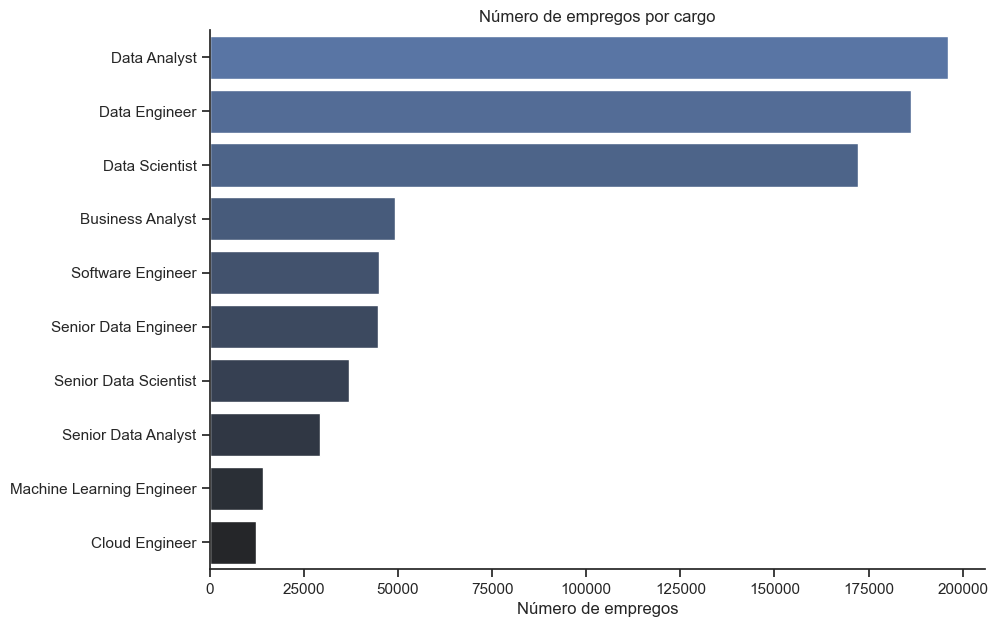

In [60]:
plt.figure(figsize=(10, 7))
sns.set_theme(style='ticks')
sns.barplot(data=grafico_titulos, x='count', y=grafico_titulos.index,  palette='dark:b_r')
sns.despine()
plt.title('Número de empregos por cargo')
plt.xlabel('Número de empregos')
plt.ylabel('')
plt.show()

In [61]:
graf_jobcountry = dados['job_country'].value_counts().to_frame().head(20)
graf_jobcountry

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694
Spain,25100
Singapore,23696
Sudan,21781
Netherlands,20631


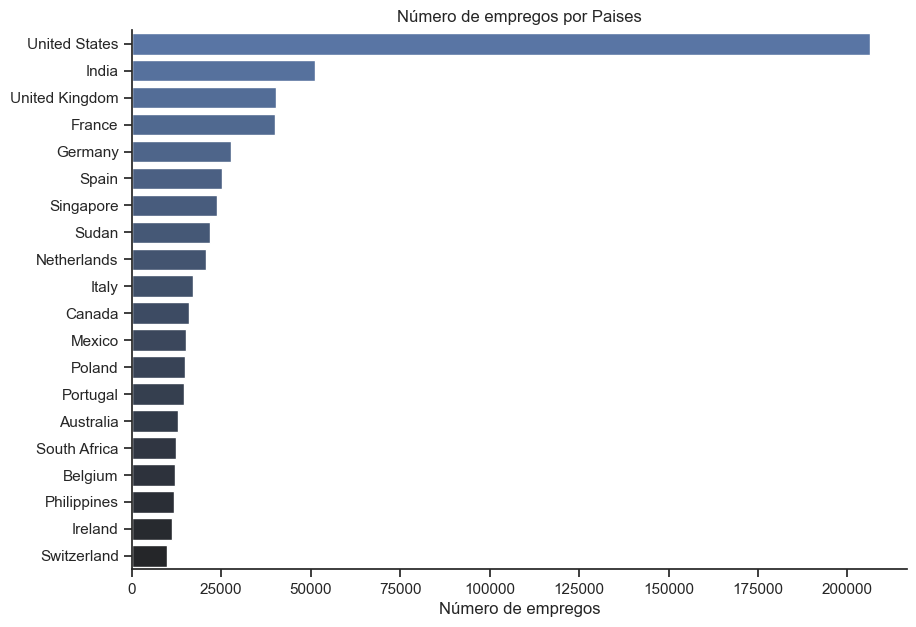

In [62]:
plt.figure(figsize=(10, 7))
sns.set_theme(style='ticks')
sns.barplot(data=graf_jobcountry, x='count', y=graf_jobcountry.index,  palette='dark:b_r')
sns.despine()
plt.title('Número de empregos por Paises')
plt.xlabel('Número de empregos')
plt.ylabel('')
plt.show()

In [63]:
graf_compname = dados['company_name'].value_counts().to_frame()[1:].head(20)
graf_compname

,count
company_name,
Booz Allen Hamilton,2879
Dice,2827
Harnham,2547
Insight Global,2254
Citi,2164
Confidenziale,2040
Listopro,1984
Capital One,1946
Walmart,1863


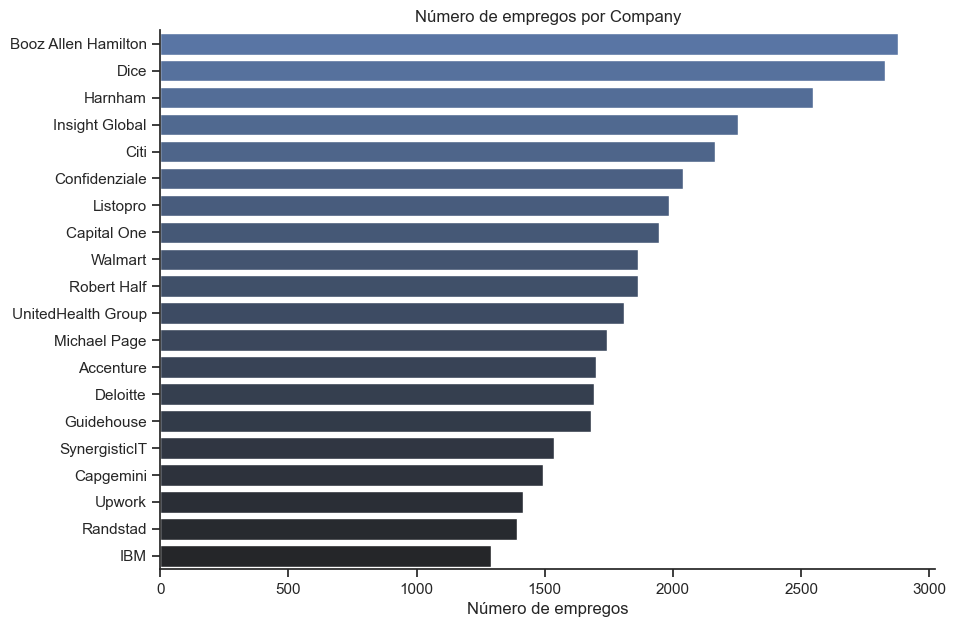

In [64]:
plt.figure(figsize=(10, 7))
sns.set_theme(style='ticks')
sns.barplot(data=graf_compname, x='count', y=graf_compname.index,  palette='dark:b_r')
sns.despine()
plt.title('Número de empregos por Company')
plt.xlabel('Número de empregos')
plt.ylabel('')
plt.show()

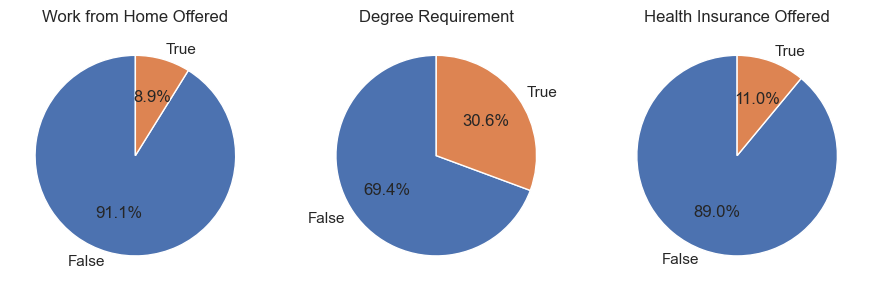

In [65]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(dados[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

###Exploração e Análise dos Dados de 'DATA ANALYSTS' a nível dos EUA. 

In [66]:
dados['job_country'].value_counts().head(5)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Name: count, dtype: int64

In [67]:
dados['job_title_short'].value_counts().head()

job_title_short
Data Analyst         196075
Data Engineer        186241
Data Scientist       172286
Business Analyst      49063
Software Engineer     44929
Name: count, dtype: int64

In [68]:
#Filtrando os dados da EUA
data_EUA = dados[(dados['job_country'] == 'United States') & (dados['job_title_short'] == 'Data Analyst')]
data_EUA.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
638006,Data Analyst,ERP Process/Data Analyst w/Manufacturing Exper...,"Corona, CA",via Dice,Full-time,False,"California, United States",2023-02-16 12:00:45,False,True,United States,hour,NaN,70.0,Experis,"[go, oracle, power bi, excel]","{'analyst_tools': ['power bi', 'excel'], 'clou..."
459353,Data Analyst,Data analyst-sprak,"New York, NY",via Dice,Contractor,False,"New York, United States",2023-08-02 14:00:01,True,False,United States,NaN,NaN,NaN,"eTek IT Services, Inc.",[spark],{'libraries': ['spark']}
506768,Data Analyst,Data Analyst,"Tinley Park, IL",via BeBee,Full-time,False,"Illinois, United States",2023-08-01 11:02:59,False,True,United States,NaN,NaN,NaN,Tech Tammina,"[sql, power bi]","{'analyst_tools': ['power bi'], 'programming':..."


In [69]:
#Nº de oferta no total:
len(data_EUA.index)

67816

In [70]:
#Descrições da variavel salário (média e salario por hora) 
data_EUA.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,67816,4350.000000,3980.000000
mean,2023-06-15 03:16:27.397118464,94553.964924,38.312172
min,2023-01-01 00:00:04,25000.000000,8.000000
25%,2023-03-12 18:02:09.750000128,71262.500000,24.000000
50%,2023-06-11 18:49:23.500000,90000.000000,33.000000
75%,2023-09-08 19:01:58.249999872,112500.000000,50.000000
max,2023-12-31 23:31:54,375000.000000,391.000000
std,NaN,33248.650655,18.758708


In [71]:
# Os 20 tipo de trabalho mais comum no que se refere ao Periodo do trabalho
data_EUA['job_schedule_type'].value_counts().head(20)

job_schedule_type
Full-time                               57180
Contractor                               6000
Full-time and Part-time                   822
Part-time                                 770
Internship                                618
Contractor and Temp work                  381
Full-time and Contractor                  317
Temp work                                 305
Full-time and Temp work                   279
Full-time and Internship                  222
Full-time, Part-time, and Internship       48
Full-time, Contractor, and Temp work       22
Part-time and Internship                   20
Full-time and Per diem                     18
Part-time and Contractor                   16
Per diem                                   14
Part-time and Temp work                    11
Full-time, Part-time, and Temp work        10
Full-time, Part-time, and Contractor       10
Temp work and Internship                    9
Name: count, dtype: int64

In [72]:
# Nos EUA a ditribuição em home work ou Presencial estão distribuidos em: False - Presencial e True - homw_Work
var = data_EUA['job_work_from_home'].value_counts()
var

job_work_from_home
False    62710
True      5106
Name: count, dtype: int64

In [73]:
#Exploração dos Locais de Trabalho nos EUA dos Data Analysts 
plot_location = data_EUA['job_location'].value_counts().head(10).to_frame()
plot_location

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


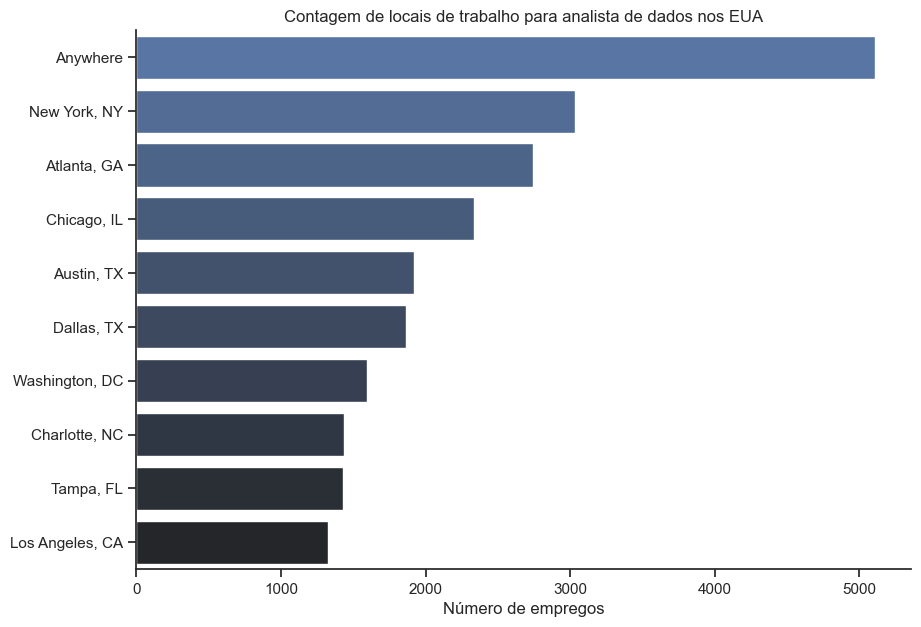

In [74]:
plt.figure(figsize=(10, 7))
sns.set_theme(style='ticks')
sns.barplot(data=plot_location, x='count', y=plot_location.index,  palette='dark:b_r')
sns.despine()
plt.title('Contagem de locais de trabalho para analista de dados nos EUA')
plt.xlabel('Número de empregos')
plt.ylabel('')
plt.show()

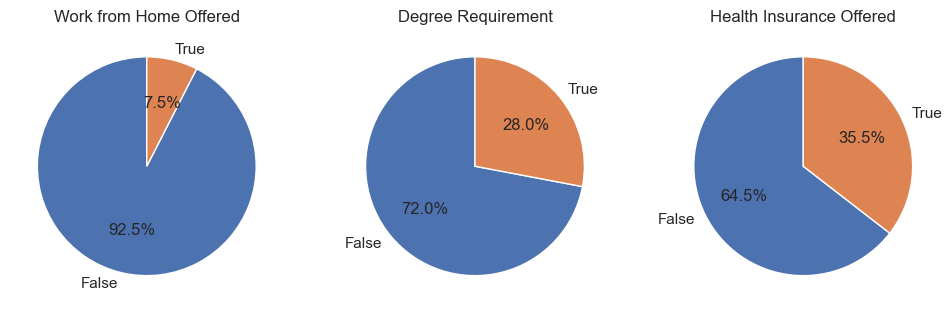

In [75]:
#Como estã caraterizadas a Oportunidade de Trabalho a dos EUA dos Data Analysts 

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(data_EUA[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()


In [76]:
#Empresas que podem ser exploradas
plot_compusa = data_EUA['company_name'].value_counts().head(10).to_frame()
plot_compusa

,count
company_name,
Robert Half,959
Insight Global,827
Dice,584
UnitedHealth Group,507
Get It Recruit - Information Technology,503
Citi,477
Corporate,416
SynergisticIT,374
Centene Corporation,350


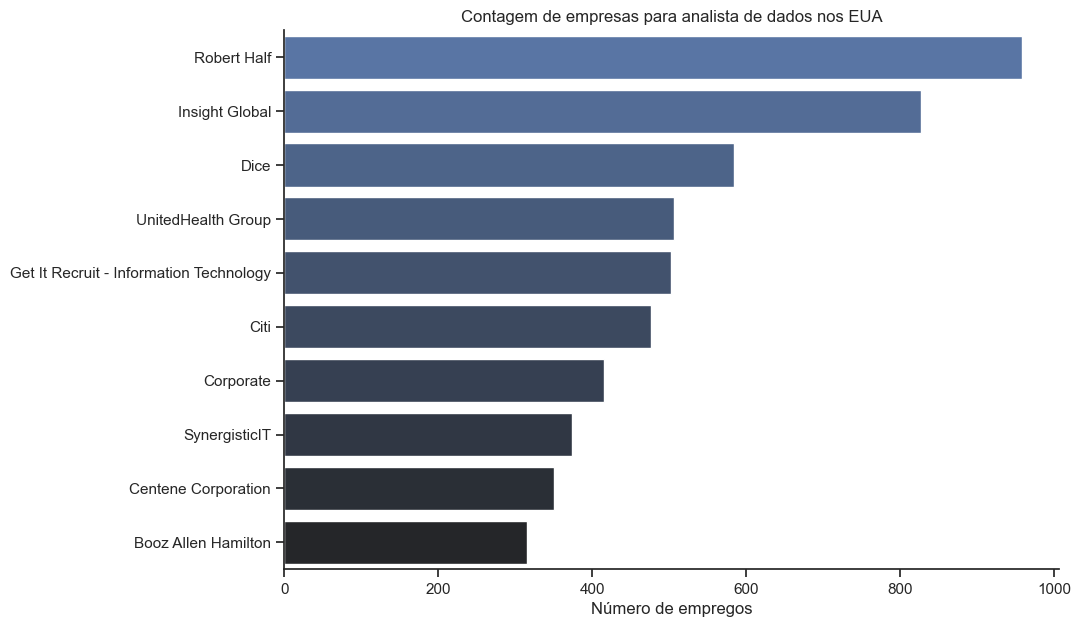

In [77]:
plt.figure(figsize=(10, 7))
sns.set_theme(style='ticks')
sns.barplot(data=plot_compusa, x='count', y=plot_compusa.index,  palette='dark:b_r')
sns.despine()
plt.title('Contagem de empresas para analista de dados nos EUA')
plt.xlabel('Número de empregos')
plt.ylabel('')
plt.show()

###Exploração e Análise dos Dados de 'DATA ANALYSTS' a nível dos BRASIL. 

In [78]:
dados['job_country'].value_counts().head(20)

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Spain              25100
Singapore          23696
Sudan              21781
Netherlands        20631
Italy              17013
Canada             16029
Mexico             15139
Poland             14793
Portugal           14508
Australia          12955
South Africa       12414
Belgium            12078
Philippines        11786
Ireland            11162
Switzerland         9924
Name: count, dtype: int64

In [79]:
#Filtrando os dados da EUA
data_BR = dados[(dados['job_country'] == 'Brazil') & (dados['job_title_short'] == 'Data Analyst')]
data_BR.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
41161,Data Analyst,Estagio - Data Analytics,"Brasília - Brasilia, Federal District, Brazil",via BeBee,Internship,False,Brazil,2023-09-17 06:17:42,False,False,Brazil,NaN,NaN,NaN,Netvagas - (569956624),"[python, power bi]","{'analyst_tools': ['power bi'], 'programming':..."
94249,Data Analyst,Analytics engineer remoto,"Florianópolis, State of Santa Catarina, Brazil",via Sercanto,Full-time,False,Brazil,2023-03-06 00:20:12,True,False,Brazil,NaN,NaN,NaN,Indicium,NaN,NaN
601231,Data Analyst,Integrations Data Analyst - Terceiro,Brazil,via Linkedin,Full-time,False,Brazil,2023-01-27 10:03:54,True,False,Brazil,NaN,NaN,NaN,Page Personnel,"[sql, python, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ..."


In [80]:
len(data_BR.index)

599

In [81]:
data_BR.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,599,13.000000,0.0
mean,2023-07-10 16:35:19.617696256,76367.807692,NaN
min,2023-01-01 10:07:30,50400.000000,NaN
25%,2023-04-14 22:27:06,57500.000000,NaN
50%,2023-07-26 16:17:34,79200.000000,NaN
75%,2023-09-30 15:43:52,98500.000000,NaN
max,2023-12-29 10:13:12,102500.000000,NaN
std,NaN,20098.915974,NaN


In [82]:
#Qual é a preferencia dos Data Analysis no que se refer ao tempo de trabalho
data_BR['job_schedule_type'].value_counts().head(20)

job_schedule_type
Full-time                               558
Contractor                               11
Part-time                                11
Internship                                9
Full-time and Contractor                  1
Full-time and Internship                  1
Part-time and Temp work                   1
Full-time, Part-time, and Contractor      1
Full-time and Temp work                   1
Contractor and Temp work                  1
Full-time and Part-time                   1
Name: count, dtype: int64

In [83]:
#False - Presencial & True - Home work
type_job = data_BR['job_work_from_home'].value_counts()
type_job

job_work_from_home
False    450
True     149
Name: count, dtype: int64

In [89]:
#Onde mais se encontram os Data Analysis no Brásil?
plot_jbl = data_BR['job_location'].value_counts().head(10).to_frame()
plot_jbl

,count
job_location,
Brazil,261
Anywhere,149
"São Paulo, State of São Paulo, Brazil",79
"Brasília - Brasilia, Federal District, Brazil",28
"Rio de Janeiro, State of Rio de Janeiro, Brazil",12
"Campinas, State of São Paulo, Brazil",9
"Porto Alegre, RS, Brazil",8
"Goiânia, State of Goiás, Brazil",6
"Curitiba, State of Paraná, Brazil",5


In [92]:
#plot_jbl = plot_jbl[plot_jbl['job_location'] != 'Anywhere']
#plot_jbl

plot_jbl = plot_jbl.drop('Anywhere')
plot_jbl

,count
job_location,
Brazil,261
"São Paulo, State of São Paulo, Brazil",79
"Brasília - Brasilia, Federal District, Brazil",28
"Rio de Janeiro, State of Rio de Janeiro, Brazil",12
"Campinas, State of São Paulo, Brazil",9
"Porto Alegre, RS, Brazil",8
"Goiânia, State of Goiás, Brazil",6
"Curitiba, State of Paraná, Brazil",5
"Recife, State of Pernambuco, Brazil",5


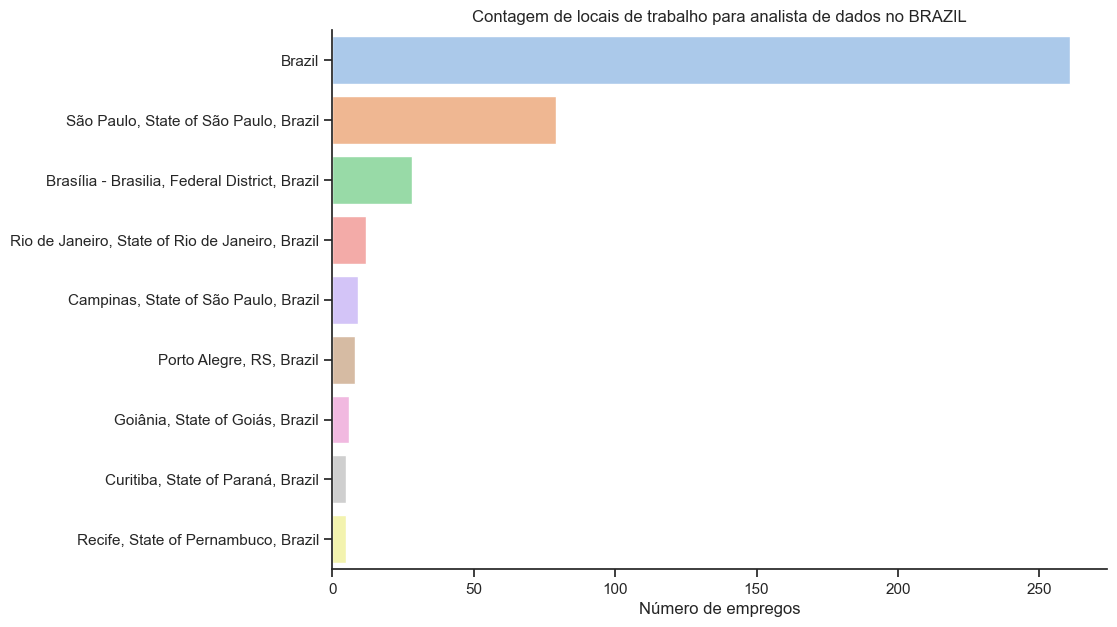

In [93]:
plt.figure(figsize=(10, 7))
sns.set_theme(style='ticks')
sns.barplot(data=plot_jbl, x='count', y=plot_jbl.index, palette='pastel')
sns.despine()
plt.title('Contagem de locais de trabalho para analista de dados no BRAZIL')
plt.xlabel('Número de empregos')
plt.ylabel('')
plt.show()

In [99]:
data_BR['job_health_insurance'].unique()

array([False])

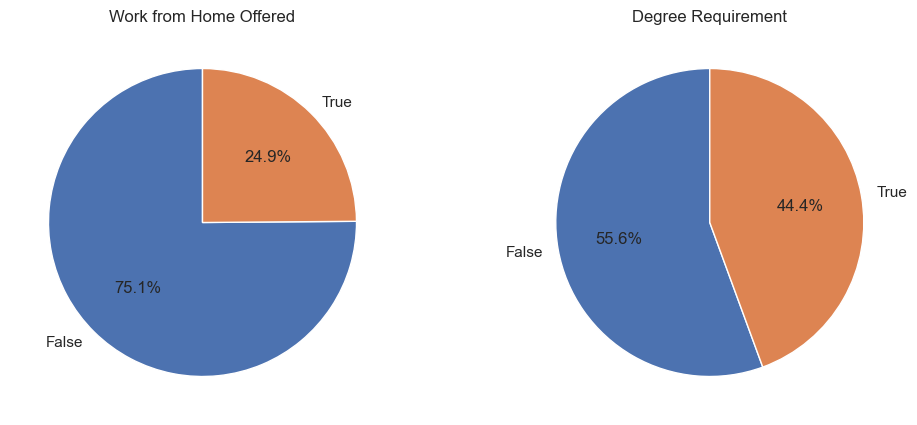

In [101]:
#Pontos a considerar nos trabalhos de Data Analysis no Brazil 
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    #'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(data_BR[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()



In [102]:
plot_compy = data_BR['company_name'].value_counts().head(10).to_frame()
plot_compy

,count
company_name,
Netvagas,11
CI&T,11
BairesDev,10
Gympass,10
Turing,8
Peroptyx,7
Viridios,6
Cadastra,6
iFood,6


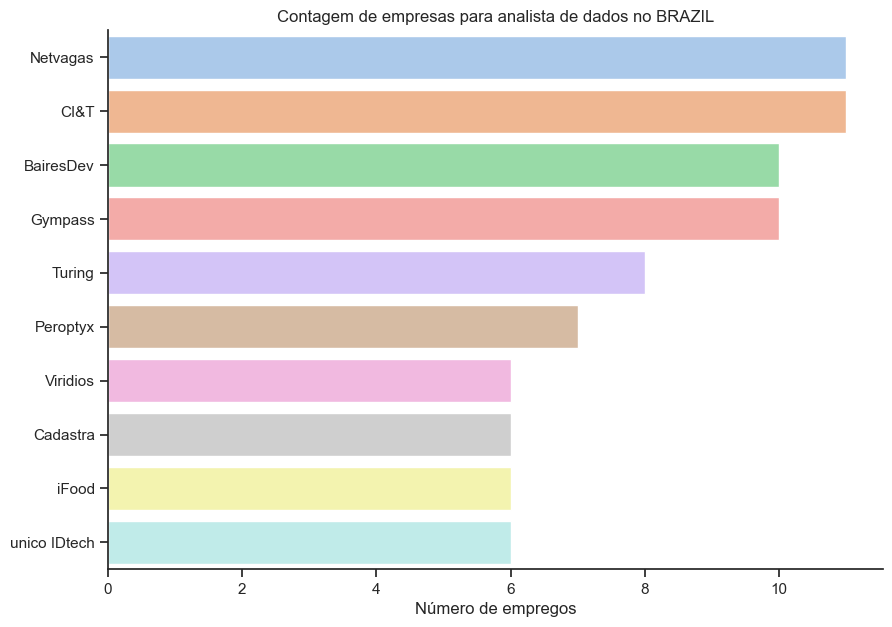

In [103]:
plt.figure(figsize=(10, 7))
sns.set_theme(style='ticks')
sns.barplot(data=plot_compy, x='count', y=plot_compy.index, palette='pastel')
sns.despine()
plt.title('Contagem de empresas para analista de dados no BRAZIL')
plt.xlabel('Número de empregos')
plt.ylabel('')
plt.show()

###Exploração e Análise dos Dados de 'DATA ANALYSTS' a nível da ÍNDIA. 

In [104]:
#Filtrando os dados da EUA
data_IND = dados[(dados['job_country'] == 'India') & (dados['job_title_short'] == 'Data Analyst')]
data_IND.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
387435,Data Analyst,Analyst - Data Analysis,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-11 18:12:52,False,False,India,NaN,NaN,NaN,Inizio Advisory,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
505708,Data Analyst,Assoc Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-11-16 11:10:34,False,False,India,NaN,NaN,NaN,TransUnion,"[sql, python, gcp, aws, spark, hadoop, excel, ...","{'analyst_tools': ['excel', 'tableau'], 'cloud..."
192593,Data Analyst,Data Analysis Internship in Gurgaon at Vidyaku...,"Gurugram, Haryana, India",via Internshala,Full-time,False,India,2023-04-20 15:08:18,False,False,India,NaN,NaN,NaN,Vidyakul Learning Space Private Limited,"[python, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."


In [105]:
len(data_IND.index)

6121

In [106]:
#Qual é a preferencia dos Data Analysis no que se refer ao tempo de trabalho
data_IND.describe()

,job_posted_date,salary_year_avg,salary_hour_avg
count,6121,94.000000,3.0
mean,2023-07-15 16:18:31.082502656,99149.925532,25.0
min,2023-01-01 09:29:43,32400.000000,25.0
25%,2023-04-05 07:13:10,71700.000000,25.0
50%,2023-08-04 09:11:53,100500.000000,25.0
75%,2023-10-23 07:08:16,111175.000000,25.0
max,2023-12-31 23:06:01,650000.000000,25.0
std,NaN,64297.459680,0.0


In [107]:
data_IND['job_schedule_type'].value_counts().head(20)

job_schedule_type
Full-time                                5598
Contractor                                149
Part-time                                 110
Internship                                109
Full-time and Internship                   31
Full-time, Temp work, and Internship       23
Full-time and Contractor                   19
Contractor and Temp work                   16
Full-time and Part-time                    16
Temp work                                  10
Part-time and Internship                    7
Part-time, Temp work, and Internship        4
Full-time, Part-time, and Temp work         2
Temp work and Internship                    2
Full-time, Contractor, and Internship       2
Volunteer                                   1
Full-time, Contractor, and Temp work        1
Full-time and Temp work                     1
Pekerjaan tetap                             1
Name: count, dtype: int64

In [108]:
#False - Presencial & True - Home work
job_type = data_IND['job_work_from_home'].value_counts()
job_type

job_work_from_home
False    5069
True     1052
Name: count, dtype: int64

In [109]:
plot_jobsl = data_IND['job_location'].value_counts().head(10).to_frame()
plot_jobsl

,count
job_location,
India,2056
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106


In [110]:
plot_jobsl = plot_jobsl.drop('Anywhere')
plot_jobsl

,count
job_location,
India,2056
"Hyderabad, Telangana, India",1289
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106
"Secunderabad, Telangana, India",84


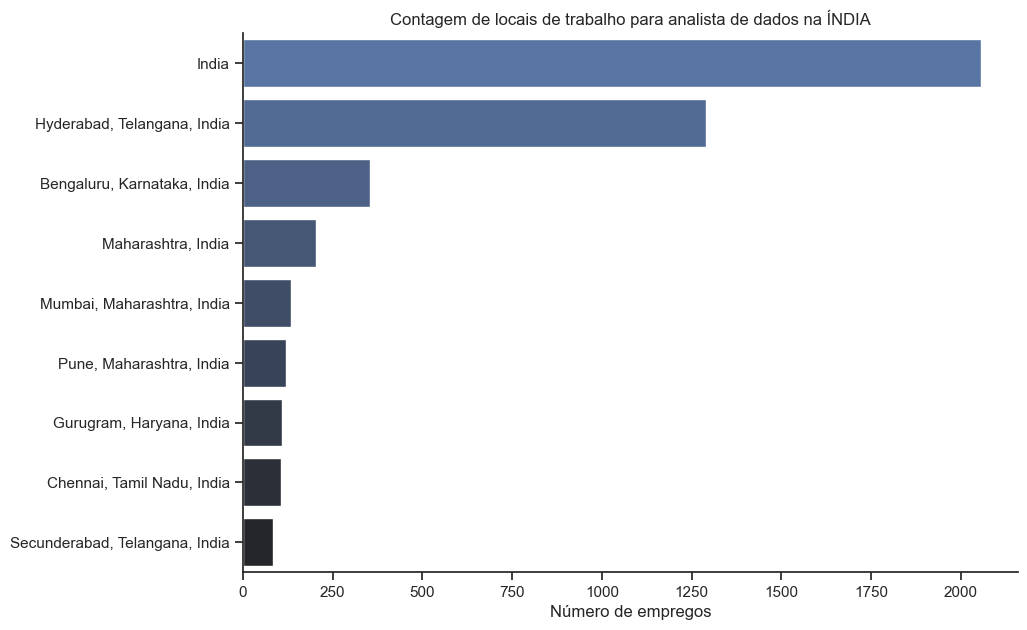

In [111]:
plt.figure(figsize=(10,7))
sns.set_theme(style='ticks')
sns.barplot(data=plot_jobsl, x='count', y=plot_jobsl.index, palette='dark:b_r')
sns.despine()
plt.title('Contagem de locais de trabalho para analista de dados na ÍNDIA')
plt.xlabel('Número de empregos')
plt.ylabel('')
plt.show()

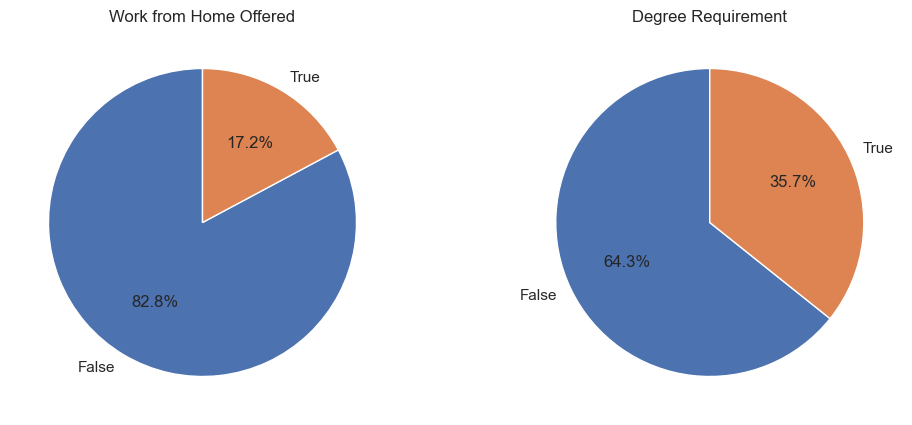

In [113]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    #'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(data_IND[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()



In [115]:
plot_comp = data_IND['company_name'].value_counts().head(10).to_frame()
plot_comp

,count
company_name,
SAZ India,100
S&P Global,93
Confidential,82
Prometrics Solutions,72
PepsiCo,58
Maxgen Technologies Private Limited,57
JPMorgan Chase & Co.,53
JP Morgan Chase,51
Ovidtech Technologies,49


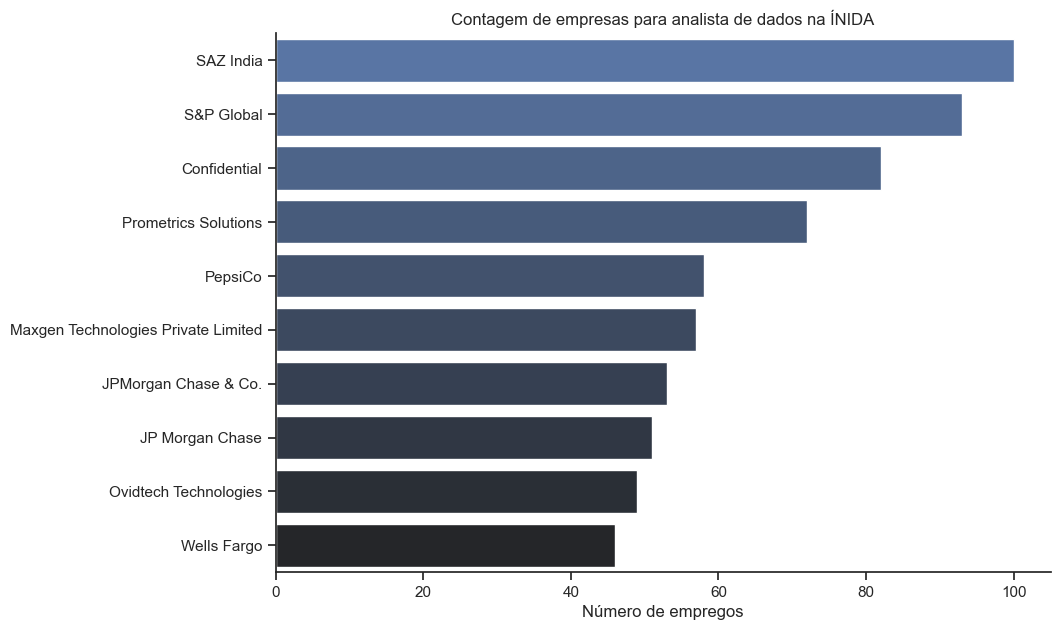

In [116]:
plt.figure(figsize=(10,7))
sns.set_theme(style='ticks')
sns.barplot(data=plot_comp, x='count', y=plot_comp.index, palette='dark:b_r')
sns.despine()
plt.title('Contagem de empresas para analista de dados na ÍNIDA')
plt.xlabel('Número de empregos')
plt.ylabel('')
plt.show()